In [152]:
import sys
from pathlib import Path 
sys.path.append(str(Path.cwd().parent.parent))
import numpy as np
from kymatio.scattering2d.core.scattering2d import scattering2d
import matplotlib.pyplot as plt
import torch
import torchvision
from kymatio import Scattering2D
from PIL import Image
from IPython.display import display 
from torchvision.transforms import *

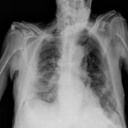

In [175]:
#img = Image.open('/NOBACKUP/gauthiers/KTH/sample_a/wood/54a-scale_10_im_10_col.png')
img = Image.open('/NOBACKUP/gauthiers/chest_xrays_preprocess/train/positive/MIDRC-RICORD-1C-SITE2-000216-21074-0.png')
rsz_transf = torchvision.transforms.Resize((128,128))
img = rsz_transf(img)
display(img)

Rotation

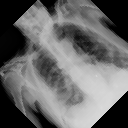

In [176]:
transformation = torchvision.transforms.RandomRotation(degrees = 45)
transformation.degrees = [45,45]
img_rot2 = transformation(img)
display(img_rot2)

Blur

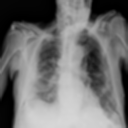

In [177]:
transformation = torchvision.transforms.GaussianBlur(3)
img_blur = transformation(img)
display(img_blur)

Perspective

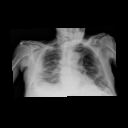

In [178]:
transformation = torchvision.transforms.RandomPerspective()
img_rdmPersp = transformation(img)
display(img_rdmPersp)

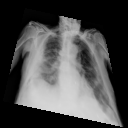

In [191]:
transforms = torchvision.transforms.RandomPerspective(distortion_scale=0.5)
img_1 = transforms(img)
display(img_1)


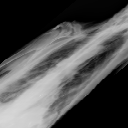

In [193]:
transforms = torchvision.transforms.RandomAffine(degrees = 0, shear=90)
img_2 = transforms(img)
display(img_2)


À la Mallat

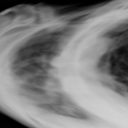

CPU times: user 564 ms, sys: 0 ns, total: 564 ms
Wall time: 562 ms


In [174]:
%%time
# def tau(u):
#     print(u)
#     return [0.5*u[0]+0.5*u[1]**2,0.3*u[1]]
#tau = lambda u : 0.2*u
#tau = lambda u : [0.5*u[0]+0.5*u[1]**2,0.3*u[1]] #la fonction tau de Mallat
#tau_mat = lambda u : torch.tensor([[vectorize_tau(grid)] for j in range(len(u))] for i in range(len(u))]) #dim x dim x 2
# vectorize_tau = lambda grid : np.vectorize(tau)(grid) #dim x dim x 2   
tau = lambda grid : torch.tensor([[[0.5*grid[i,j,0]+0.5*grid[i,j,1]**2,0.3*grid[i,j,1]] for j in range(len(grid))] for i in range(len(grid))])
def diffeo(img,tau):
    transf = torchvision.transforms.ToTensor()
    img = transf(img).unsqueeze(0)
    dim = img.shape[-1]
    grid = torch.tensor([[[x,y] for x in torch.linspace(-1,1,dim)] for y in torch.linspace(-1,1,dim)])
    grid_transf = (grid - tau(grid)).unsqueeze(0)
    img_transf = torch.nn.functional.grid_sample(img,grid_transf).squeeze(0)
    transf = torchvision.transforms.ToPILImage()
    return transf(img_transf)
img_diffeo = diffeo(img,tau)
display(img_diffeo)